In [14]:
# Importing libraries

import numpy as np
from statsmodels import robust
import pandas as pd
from matplotlib import pyplot as plt
import sys
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# print version for Python and major libraries

print(f'Python version: {sys.version}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sk.__version__}')



Python version: 3.12.3 (main, Jun 18 2025, 17:59:45) [GCC 13.3.0]
numpy version: 2.3.1
pandas version: 2.3.1
matplotlib version: 3.10.3
seaborn version: 0.13.2
sklearn version: 1.7.0


In [15]:
# read in files. Change the file locations below to match where they are in your computer.

wdbc_df = pd.read_csv('wdbc.data', 
                      names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'])

In [16]:
# print mean values
print("Mean Data:")
print(wdbc_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']].mean())
# print median values
print("\nMedian Data Iris:")
print(wdbc_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']].median())


Mean Data:
radius1                14.127292
texture1               19.289649
perimeter1             91.969033
area1                 654.889104
smoothness1             0.096360
compactness1            0.104341
concavity1              0.088799
concave_points1         0.048919
symmetry1               0.181162
fractal_dimension1      0.062798
radius2                 0.405172
texture2                1.216853
perimeter2              2.866059
area2                  40.337079
smoothness2             0.007041
compactness2            0.025478
concavity2              0.031894
concave_points2         0.011796
symmetry2               0.020542
fractal_dimension2      0.003795
radius3                16.269190
texture3               25.677223
perimeter3            107.261213
area3                 880.583128
smoothness3             0.132369
compactness3            0.254265
concavity3              0.272188
concave_points3         0.114606
symmetry3               0.290076
fractal_dimension3      0.083946

In [17]:
# print MAD values
print("MAD All Data :")
print(wdbc_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']].apply(robust.mad))
# print SD values
print("\nSD All Data : ")
print(wdbc_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']].std())
# print IQR values
print("\nIQR All Data : ")
nameList = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
for name in nameList :
    quartiles = wdbc_df[name].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    print(name,"\t", iqr)

MAD All Data :
radius1                 2.816944
texture1                4.166112
perimeter1             18.843874
area1                 227.282920
smoothness1             0.014085
compactness1            0.048377
concavity1              0.059986
concave_points1         0.029860
symmetry1               0.025352
fractal_dimension1      0.006257
radius2                 0.157156
texture2                0.467464
perimeter2              1.141604
area2                  13.625114
smoothness2             0.002151
compactness2            0.012988
concavity2              0.018503
concave_points2         0.005167
symmetry2               0.005827
fractal_dimension2      0.001592
radius3                 3.647201
texture3                6.419668
perimeter3             25.011499
area3                 319.649038
smoothness3             0.021794
compactness3            0.129135
concavity3              0.195703
concave_points3         0.066080
symmetry3               0.050705
fractal_dimension3      0.01

In [18]:
# finding outliers
nameList = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
print("wdbc All:\n")
for name in nameList :
    quartiles = wdbc_df[name].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    print(name,"Outliers (outside [", lower_bound, "] - [", upper_bound,"] ):")
    for data in wdbc_df[name]:
        if(data < lower_bound or data > upper_bound):
            print("data: ",data)


wdbc All:

radius1 Outliers (outside [ 5.579999999999999 ] - [ 21.9 ] ):
data:  25.22
data:  22.27
data:  24.25
data:  23.27
data:  27.22
data:  23.29
data:  28.11
data:  23.21
data:  23.51
data:  25.73
data:  22.01
data:  27.42
data:  23.09
data:  24.63
texture1 Outliers (outside [ 7.725000000000003 ] - [ 30.244999999999997 ] ):
data:  32.47
data:  33.81
data:  39.28
data:  33.56
data:  31.12
data:  30.72
data:  30.62
perimeter1 Outliers (outside [ 31.775000000000013 ] - [ 147.49499999999998 ] ):
data:  171.5
data:  152.8
data:  166.2
data:  152.1
data:  182.1
data:  158.9
data:  188.5
data:  153.5
data:  155.1
data:  174.2
data:  186.9
data:  152.1
data:  165.5
area1 Outliers (outside [ -123.30000000000001 ] - [ 1326.3000000000002 ] ):
data:  1404.0
data:  1878.0
data:  1509.0
data:  1761.0
data:  1686.0
data:  2250.0
data:  1685.0
data:  2499.0
data:  1670.0
data:  1364.0
data:  1419.0
data:  1491.0
data:  1747.0
data:  2010.0
data:  1546.0
data:  1482.0
data:  1386.0
data:  1335.0


In [19]:
# getting column names

columns = wdbc_df.columns.values

# only getting the column names for the numerical attributes
num_columns = columns[:4]
print(num_columns)

['ID' 'Diagnosis' 'radius1' 'texture1']


In [20]:
normalized = wdbc_df.loc[:, nameList].values
normalized = StandardScaler().fit_transform(normalized)
normalized.shape

(569, 30)

In [21]:
print(normalized)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [22]:
pca_wdbc = PCA(n_components=2)
normalized_PCA = pca_wdbc.fit_transform(normalized)

In [23]:
print(normalized_PCA)
print('Variation per component: {}'.format(pca_wdbc.explained_variance_ratio_))
print("This means that abot 44% of the data is held by PCA 1, while PCA 2 holds only about 19% of the data. The other 37% or so are lost in the 2 dimensional projection. So the low number of PCAs account for most of the variance")

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]
Variation per component: [0.44272026 0.18971182]
This means that abot 44% of the data is held by PCA 1, while PCA 2 holds only about 19% of the data. The other 37% or so are lost in the 2 dimensional projection. So the low number of PCAs account for most of the variance


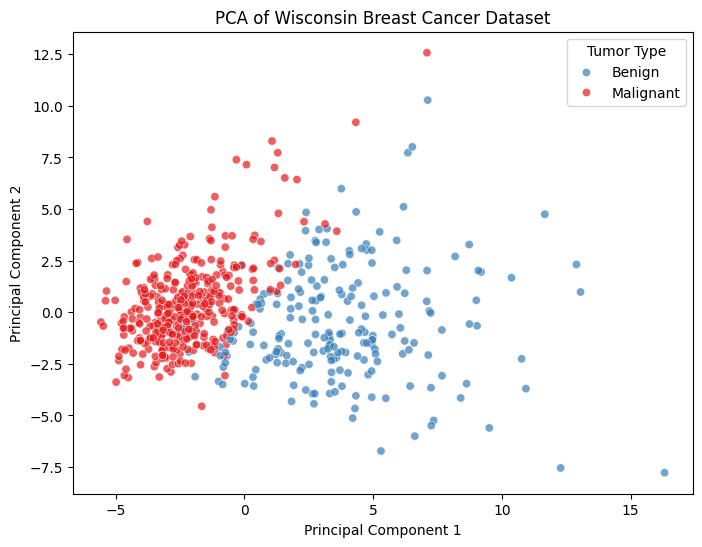

In [24]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=normalized_PCA, columns=['PC1', 'PC2'])

# Add the diagnosis labels
pca_df['Diagnosis'] = wdbc_df['Diagnosis'].astype('category')

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', palette='Set1', alpha=0.7)

plt.title('PCA of Wisconsin Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Tumor Type', labels=['Benign', 'Malignant'])
plt.show()

In [25]:
print(wdbc_df.cov(numeric_only = True))

                              ID       radius1      texture1    perimeter1  \
ID                  1.563015e+16  3.287883e+07  5.364807e+07  2.222490e+08   
radius1             3.287883e+07  1.241892e+01  4.907582e+00  8.544714e+01   
texture1            5.364807e+07  4.907582e+00  1.849891e+01  3.443976e+01   
perimeter1          2.222490e+08  8.544714e+01  3.443976e+01  5.904405e+02   
area1               4.262946e+09  1.224483e+03  4.859938e+02  8.435772e+03   
smoothness1        -2.280205e+04  8.454460e-03 -1.414779e-03  7.083607e-02   
compactness1        6.318839e+02  9.419706e-02  5.376681e-02  7.147141e-01   
concavity1          4.991277e+05  1.901276e-01  1.036923e-01  1.387234e+00   
concave_points1     2.142177e+05  1.124751e-01  4.897693e-02  8.023604e-01   
symmetry1          -7.579262e+04  1.427317e-02  8.418876e-03  1.219216e-01   
fractal_dimension1 -4.635137e+04 -7.753706e-03 -2.321158e-03 -4.485888e-02   
radius2             4.959431e+06  6.636503e-01  3.290374e-01  4.